# <center>Práctica 2</center>
## <center>Filtrado de imágenes en el dominio espacial </center>

In [1]:
#importamos librerías necesarias
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imfunctions as imf
%matplotlib notebook

[[127  32  24  36  80  95]
 [127  32  46  36  80  95]
 [127  32 100  36  80  95]
 [ 64 255   8  12  25  67]]
out double
[[1.         0.1254902  0.09411765 0.14117647 0.31372549 0.37254902]
 [0.         0.1254902  0.18039216 0.14117647 0.31372549 0.37254902]
 [0.49803922 0.1254902  0.39215686 0.14117647 0.31372549 0.37254902]
 [0.25098039 1.         0.03137255 0.04705882 0.09803922 0.2627451 ]]
out uint 8
[[255  32  24  36  80  95]
 [  0  32  46  36  80  95]
 [127  32 100  36  80  95]
 [ 64 255   8  12  25  67]]


**I. Imágenes contaminadas con ruido**

Considere las fuentes de ruido 'gaussian' y 'speckle' (también denominados ruido gaussiano y ruido granular, respectivamente) y contamine con ellas una imagen sintética de 8 bits, intensidad uniforme y luminancia 128. Considere que la imagen es cuadrada y de tamaño 256x256 píxeles. Indique y justifique la secuencia de instrucciones utilizada, tanto para generar la imagen como para
añadir ruido. Tenga en cuenta que la matriz que representa la imagen debe ser de tipo uint8.

Considere que las fuentes de ruido tienen media nula y su potencia media es 0.02 en los dos casos. 

[[128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]]


<IPython.core.display.Javascript object>


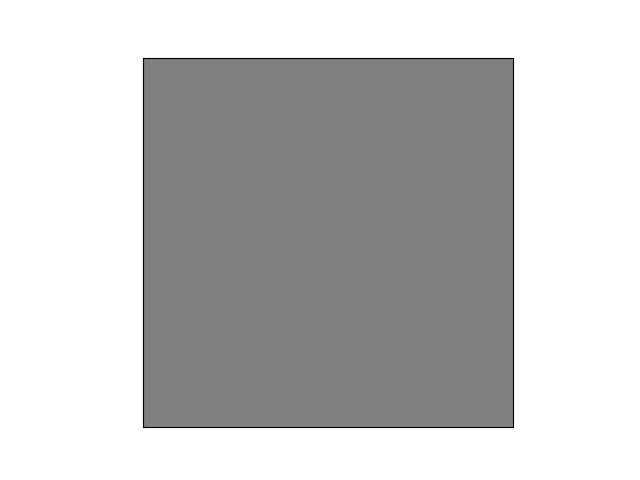

<IPython.core.display.Javascript object>


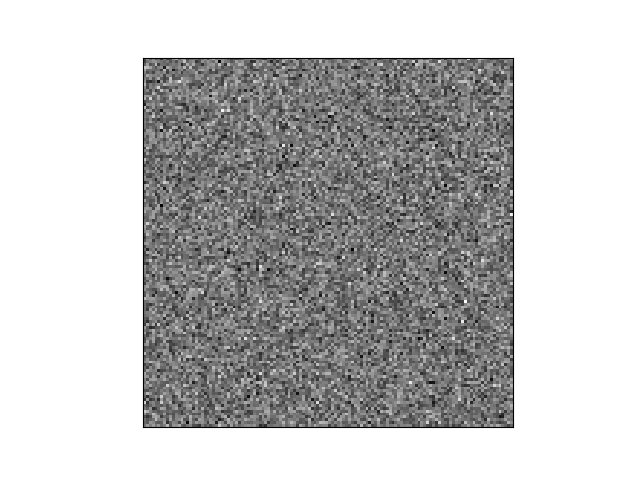

In [18]:
%matplotlib notebook
blank = np.ones((128, 128), dtype=np.uint8)*128
print(blank)
plt.figure('blank')
plt.imshow(blank, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

#generar ruido blanco

blanknoise = imf.imnoise(blank,"gauss", [0,0.1])
plt.figure('white noise')
plt.imshow(blanknoise, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

[[49 50 48 ... 58 55 55]
 [47 47 49 ... 56 57 55]
 [48 48 49 ... 57 56 57]
 ...
 [71 70 70 ... 70 69 70]
 [69 71 71 ... 70 72 71]
 [69 68 69 ... 71 72 71]]


<IPython.core.display.Javascript object>


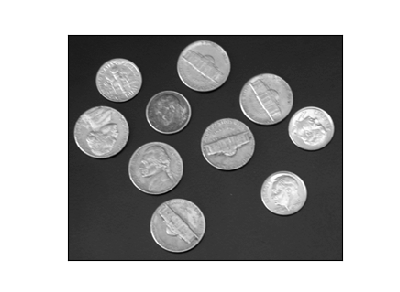

<IPython.core.display.Javascript object>


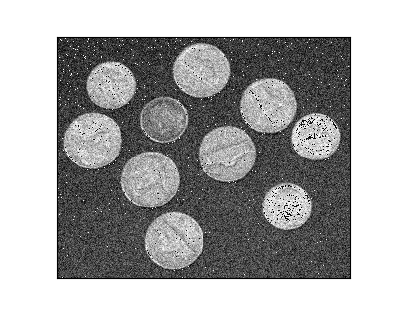

In [10]:
coins = cv2.imread('coins.png', 0)
print(coins)
plt.figure('coins')
plt.imshow(coins, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

coinsgaussian = imf.imnoise(coins,"gauss", [0,0.1])
plt.figure('coins gaussian noise')
plt.imshow(coinsgaussian, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

**Salt and pepper noise**

<IPython.core.display.Javascript object>


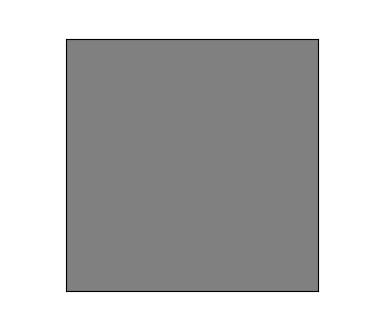

out double
[[0.50196078 0.50196078 0.50196078 ... 0.50196078 0.50196078 0.50196078]
 [0.50196078 0.50196078 1.         ... 0.50196078 0.50196078 0.50196078]
 [0.50196078 0.50196078 0.50196078 ... 0.50196078 0.50196078 0.50196078]
 ...
 [0.50196078 0.50196078 0.50196078 ... 0.50196078 0.50196078 0.50196078]
 [0.50196078 1.         0.50196078 ... 0.50196078 0.50196078 0.50196078]
 [0.50196078 0.50196078 0.50196078 ... 0.50196078 0.50196078 0.50196078]]
out uint 8
[[128 128 128 ... 128 128 128]
 [128 128 255 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ... 128 128 128]
 [128 255 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]]


<IPython.core.display.Javascript object>


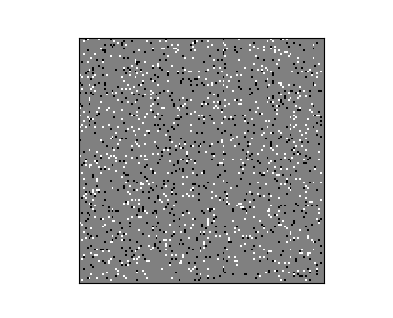

In [19]:
plt.figure('blank2')
plt.imshow(blank, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

blanksp = imf.imnoise(blank,"sandp", 0.1)
plt.figure('salt and pepper')
plt.imshow(blanksp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


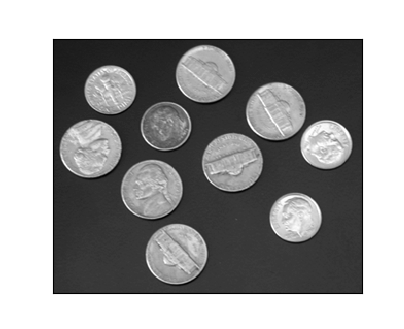

out double
[[0.19215686 1.         0.18823529 ... 0.22745098 1.         0.21568627]
 [0.18431373 0.18431373 0.19215686 ... 0.21960784 1.         0.21568627]
 [0.18823529 0.18823529 0.19215686 ... 0.22352941 0.21960784 0.22352941]
 ...
 [0.27843137 0.2745098  0.2745098  ... 0.2745098  0.27058824 0.2745098 ]
 [0.27058824 0.27843137 0.27843137 ... 0.         0.         0.27843137]
 [0.27058824 0.26666667 0.27058824 ... 0.27843137 0.28235294 0.27843137]]
out uint 8
[[ 49 255  48 ...  58 255  55]
 [ 47  47  49 ...  56 255  55]
 [ 48  48  49 ...  57  56  57]
 ...
 [ 71  70  70 ...  70  69  70]
 [ 69  71  71 ...   0   0  71]
 [ 69  68  69 ...  71  72  71]]


<IPython.core.display.Javascript object>


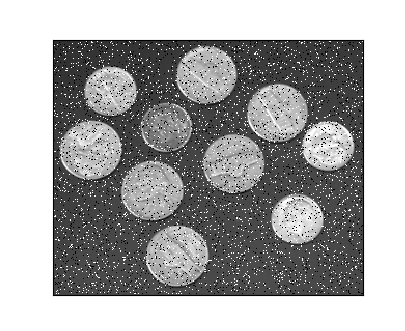

In [16]:
plt.figure('coins2')
plt.imshow(coins, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

coinssp = imf.imnoise(coins,"sandp", 0.1)
plt.figure('salt and pepper coins')
plt.imshow(coinssp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()